In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
import re
import string
from subprocess import call
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,  precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from collections import Counter
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
datasets = pd.read_csv('../datasets/emails.csv', encoding='latin-1')
datasets.head(5)

,spam,text
0,ham,Subject: naturally irresistible your corporate...
1,ham,"Subject: do not have money , get software cds ..."
2,ham,Subject: security alert - confirm your nationa...
3,ham,Subject: any med for your girl to be happy ! ...
4,ham,"Subject: justt try lt hello , welcome to phar..."


In [3]:
datasets.tail(5)

,spam,text
17,ham,"Subject: localized software , all languages av..."
18,ham,Subject: security alert - confirm your nationa...
19,ham,Subject: 21 st century web specialists jrgbm ...
20,ham,Subject: any med for your girl to be happy ! ...
21,ham,Subject: re : wearable electronics hi my name...


In [4]:
datasets.isnull().sum()

spam    0
text    0
dtype: int64

In [5]:
datasets.shape

(22, 2)

In [6]:
datasets.drop_duplicates(inplace=True)

In [7]:
datasets.shape

(20, 2)

In [8]:
datasets.dropna()

,spam,text
0,ham,Subject: naturally irresistible your corporate...
1,ham,"Subject: do not have money , get software cds ..."
2,ham,Subject: security alert - confirm your nationa...
3,ham,Subject: any med for your girl to be happy ! ...
4,ham,"Subject: justt try lt hello , welcome to phar..."
5,ham,Subject: how about obtaining a fully recognize...
6,ham,Subject: notification . email transmission t...
7,ham,Subject: congratualtions zzzz 8969 ! ! ! you ...
8,spam,Subject: re : parking space at 777 clay street...
9,spam,Subject: 3 - d seismic data and oil trading a...


In [9]:
datasets.head(5)

,spam,text
0,ham,Subject: naturally irresistible your corporate...
1,ham,"Subject: do not have money , get software cds ..."
2,ham,Subject: security alert - confirm your nationa...
3,ham,Subject: any med for your girl to be happy ! ...
4,ham,"Subject: justt try lt hello , welcome to phar..."


In [10]:
datasets.tail(5)

,spam,text
15,ham,Subject: search engine position be the very f...
16,ham,Subject: only our software is guaranteed 100 %...
17,ham,"Subject: localized software , all languages av..."
19,ham,Subject: 21 st century web specialists jrgbm ...
21,ham,Subject: re : wearable electronics hi my name...


In [11]:
datasets.shape

(20, 2)

In [12]:
datasets.columns

Index(['spam', 'text'], dtype='object')

In [13]:
# datasets = datasets.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [14]:
datasets.columns

Index(['spam', 'text'], dtype='object')

In [15]:
datasets.isnull().sum()

spam    0
text    0
dtype: int64

In [16]:
datasets.isnull()

,spam,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


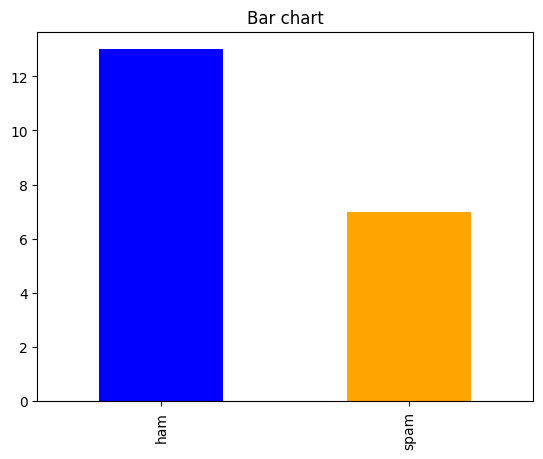

In [17]:
count_Class=pd.value_counts(datasets["spam"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

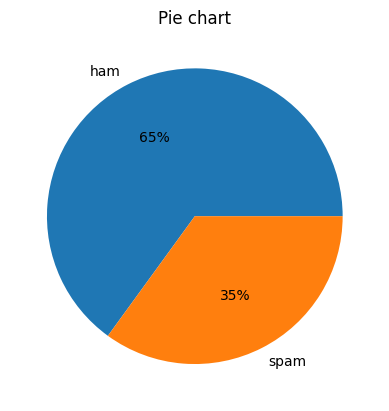

In [18]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [19]:
count1 = Counter(" ".join(datasets[datasets['spam']=="ham"]["text"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(datasets[datasets['spam']=="spam"]["text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

In [20]:
count1

[('.', 132),
 ('_', 104),
 (',', 71),
 ('to', 56),
 ('and', 46),
 (':', 44),
 ('the', 44),
 ('!', 44),
 ('-', 38),
 ('you', 35),
 ('your', 33),
 ('of', 30),
 ('a', 28),
 ('in', 22),
 ('we', 21),
 ('be', 21),
 ('is', 20),
 ('with', 16),
 ('for', 16),
 ('will', 15)]

In [21]:
df1.head(5)

,words in non-spam,count
0,.,132
1,_,104
2,",",71
3,to,56
4,and,46


In [22]:
count2

[('.', 70),
 (':', 68),
 (',', 56),
 ('-', 54),
 ('to', 40),
 ('the', 34),
 ('and', 29),
 ('/', 27),
 ('a', 23),
 ('you', 20),
 ('for', 18),
 ('i', 18),
 ('(', 16),
 (')', 16),
 ('vince', 15),
 ('is', 15),
 ('of', 14),
 ('on', 14),
 ('>', 14),
 ('we', 13)]

In [23]:
df2.head(5)

,words in spam,count_
0,.,70
1,:,68
2,",",56
3,-,54
4,to,40


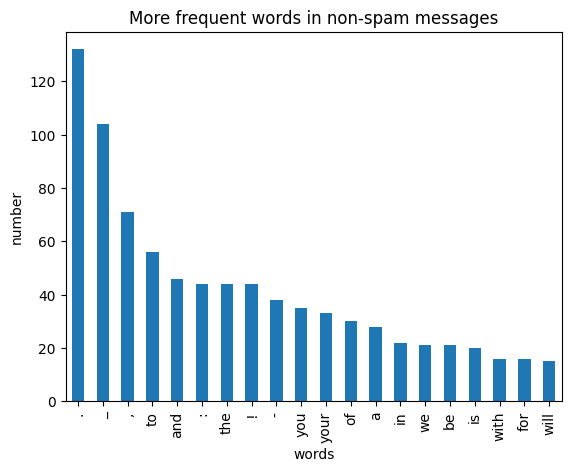

In [24]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

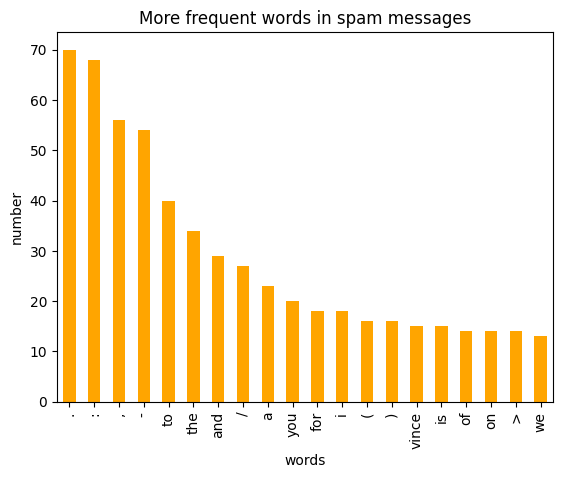

In [25]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [26]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
f = CountVectorizer(analyzer=process_text, ngram_range=(1,1))
X = f.fit_transform(datasets["text"])
features_names = (f.get_feature_names())
print(np.shape(X))
print(X)
print(X.toarray())

(20, 1144)
  (0, 98)	1
  (0, 685)	1
  (0, 556)	1
  (0, 278)	1
  (0, 518)	1
  (0, 621)	1
  (0, 834)	1
  (0, 484)	1
  (0, 840)	1
  (0, 246)	3
  (0, 634)	2
  (0, 448)	1
  (0, 976)	1
  (0, 539)	1
  (0, 559)	1
  (0, 467)	2
  (0, 209)	1
  (0, 609)	3
  (0, 962)	1
  (0, 951)	1
  (0, 740)	1
  (0, 1103)	2
  (0, 629)	2
  (0, 988)	1
  (0, 677)	2
  :	:
  (19, 1104)	1
  (19, 646)	1
  (19, 842)	1
  (19, 541)	1
  (19, 911)	1
  (19, 1063)	1
  (19, 446)	1
  (19, 639)	1
  (19, 270)	1
  (19, 744)	1
  (19, 100)	1
  (19, 364)	1
  (19, 111)	1
  (19, 765)	1
  (19, 184)	1
  (19, 515)	1
  (19, 847)	1
  (19, 564)	1
  (19, 288)	1
  (19, 82)	1
  (19, 74)	1
  (19, 96)	1
  (19, 412)	1
  (19, 34)	1
  (19, 506)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
Tf = TfidfTransformer().fit(X)
TfIdf = Tf.transform(X)

In [30]:
print(TfIdf)
print(TfIdf.shape)

  (0, 1128)	0.08770784295030201
  (0, 1121)	0.07709653645820919
  (0, 1120)	0.06956769468607832
  (0, 1103)	0.127455742628805
  (0, 1062)	0.08770784295030201
  (0, 1054)	0.06956769468607832
  (0, 1009)	0.08770784295030201
  (0, 988)	0.08770784295030201
  (0, 982)	0.08770784295030201
  (0, 978)	0.08770784295030201
  (0, 976)	0.08770784295030201
  (0, 962)	0.08770784295030201
  (0, 957)	0.08770784295030201
  (0, 951)	0.08770784295030201
  (0, 950)	0.08770784295030201
  (0, 941)	0.08770784295030201
  (0, 896)	0.07709653645820919
  (0, 880)	0.08770784295030201
  (0, 869)	0.08770784295030201
  (0, 845)	0.08770784295030201
  (0, 840)	0.08770784295030201
  (0, 834)	0.07709653645820919
  (0, 815)	0.07709653645820919
  (0, 814)	0.07709653645820919
  (0, 812)	0.08770784295030201
  :	:
  (19, 446)	0.12792272653759582
  (19, 444)	0.11244603468275488
  (19, 425)	0.12792272653759582
  (19, 412)	0.12792272653759582
  (19, 398)	0.11244603468275488
  (19, 375)	0.25584545307519163
  (19, 364)	0.12792272

In [31]:
df_idf = pd.DataFrame(Tf.idf_, index=features_names,columns=["idf_weights"])

df_idf.sort_values(by=['idf_weights'])

,idf_weights
Subject,1.000000
please,1.847298
would,2.098612
subject,2.098612
one,2.252763
...,...
extra,3.351375
extranet,3.351375
fair,3.351375
engine,3.351375


In [32]:
datasets["spam"]=datasets["spam"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(TfIdf, datasets['spam'], test_size=0.3, random_state=3)
print([np.shape(X_train), np.shape(X_test)])

[(14, 1144), (6, 1144)]


In [33]:
print("X_train : ",type(X_train)," X_test : ",type(X_test))
print("")
print("y_train : ",type(y_train)," y_test : ",type(y_test))

X_train :  <class 'scipy.sparse._csr.csr_matrix'>  X_test :  <class 'scipy.sparse._csr.csr_matrix'>

y_train :  <class 'pandas.core.series.Series'>  y_test :  <class 'pandas.core.series.Series'>


In [34]:
X_train.toarray()

array([[0.0472832 , 0.04156265, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10225958],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.08623206, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
y_train

6     0
7     0
15    0
12    1
9     1
11    1
21    0
19    0
13    1
5     0
0     0
8     1
3     0
10    1
Name: spam, dtype: int64

In [37]:
y_test

14    1
2     0
1     0
17    0
4     0
16    0
Name: spam, dtype: int64

In [38]:
#Multinomial Naive Bayes
Bayes = naive_bayes.MultinomialNB().fit(X_train, y_train)

In [39]:
#MultiNomial Naive Bayes Training Phase

In [40]:
Bptr = Bayes.predict(X_train)
Bptr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [41]:
Bactr = y_train.values
Bactr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [42]:
Bconfs = confusion_matrix(Bactr, Bptr)

In [43]:
pd.DataFrame(data = Bconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,8,0
Actual 1,0,6


In [44]:
BaS = accuracy_score(Bactr, Bptr)
BaS

1.0

In [45]:
BpS = precision_score(Bactr, Bptr)
BpS

1.0

In [46]:
BrS = recall_score(Bactr, Bptr)
BrS

1.0

In [47]:
BfS = f1_score(Bactr, Bptr)
BfS

1.0

In [48]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [BaS],
        "Precision": [BpS],
        "Recall": [BrS],
        "F1-Score": [BfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [49]:
Bclasr = classification_report(Bactr, Bptr)
print(Bclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [50]:
#MultiNomial Naive Bayes Testing Phase

In [51]:
Bptx = Bayes.predict(X_test)
Bptx

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
Bactx = y_test.values
Bactx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
Bconfs = confusion_matrix(Bactx, Bptx)

In [54]:
pd.DataFrame(data = Bconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,1,0


In [55]:
BaS = accuracy_score(Bactx, Bptx)
BaS

0.8333333333333334

In [56]:
BpS = precision_score(Bactx, Bptx)
BpS

0.0

In [57]:
BrS = recall_score(Bactx, Bptx)
BrS

0.0

In [58]:
BfS = f1_score(Bactx, Bptx)
BfS

0.0

In [59]:
Nmtx = pd.DataFrame(
    {
        "Accuracy" : [BaS],
        "Precision": [BpS],
        "Recall": [BrS],
        "F1-Score": [BfS],
    }
)
Nmtx

,Accuracy,Precision,Recall,F1-Score
0,0.833333,0.0,0.0,0.0


In [60]:
Bclasr = classification_report(Bactx, Bptx)
print(Bclasr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



In [61]:
#Decision Tree with gini-index
Decision_Tree = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

In [62]:
#Decision Tree Training Phase

In [63]:
Dptr = Decision_Tree.predict(X_train)
Dptr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [64]:
Dactr = y_train.values
Dactr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [65]:
Dconfs = confusion_matrix(Dactr, Dptr)

In [66]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,8,0
Actual 1,0,6


In [67]:
DaS = accuracy_score(Dactr, Dptr)
DaS

1.0

In [68]:
DpS = precision_score(Dactr, Dptr)
DpS

1.0

In [69]:
DrS = recall_score(Dactr, Dptr)
DrS

1.0

In [70]:
DfS = f1_score(Dactr, Dptr)
DfS

1.0

In [71]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [72]:
Dclasr = classification_report(Dactr, Dptr)
print(Dclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [73]:
#Decision Tree Testing Phase

In [74]:
Dptx = Decision_Tree.predict(X_test)
Dptx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
Dactx = y_test.values
Dactx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
Dconfs = confusion_matrix(Dactx, Dptx)

In [77]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,0,1


In [78]:
DaS = accuracy_score(Dactx, Dptx)
DaS

1.0

In [79]:
DpS = precision_score(Dactx, Dptx)
DpS

1.0

In [80]:
DrS = recall_score(Dactx, Dptx)
DrS

1.0

In [81]:
DfS = f1_score(Dactx, Dptx)
DfS

1.0

In [82]:
Nmtx = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtx

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [83]:
Dclasr = classification_report(Dactx, Dptx)
print(Dclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [84]:
#Decision Tree with entropy
Decision_Tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [85]:
#Decision Tree Training Phase

In [86]:
Dptr = Decision_Tree.predict(X_train)
Dptr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [87]:
Dactr = y_train.values
Dactr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [88]:
Dconfs = confusion_matrix(Dactr, Dptr)

In [89]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,8,0
Actual 1,0,6


In [90]:
DaS = accuracy_score(Dactr, Dptr)
DaS

1.0

In [91]:
DpS = precision_score(Dactr, Dptr)
DpS

1.0

In [92]:
DrS = recall_score(Dactr, Dptr)
DrS

1.0

In [93]:
DfS = f1_score(Dactr, Dptr)
DfS

1.0

In [94]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [95]:
Dclasr = classification_report(Dactr, Dptr)
print(Dclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [96]:
#Decision Tree Testing Phase

In [97]:
Dptx = Decision_Tree.predict(X_test)
Dptx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [98]:
Dactx = y_test.values
Dactx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [99]:
Dconfs = confusion_matrix(Dactx, Dptx)

In [100]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,0,1


In [101]:
DaS = accuracy_score(Dactx, Dptx)
DaS

1.0

In [102]:
DpS = precision_score(Dactx, Dptx)
DpS

1.0

In [103]:
DrS = recall_score(Dactx, Dptx)
DrS

1.0

In [104]:
DfS = f1_score(Dactx, Dptx)
DfS

1.0

In [105]:
Nmtx = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtx

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [106]:
Dclasr = classification_report(Dactx, Dptx)
print(Dclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [107]:
#Support Vector Classifier
model_svm = svm.SVC().fit(X_train, y_train)

In [108]:
#Support Vector Classifier Training Phase

In [109]:
Sptr = model_svm.predict(X_train)
Sptr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [110]:
Sactr = y_train.values
Sactr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [111]:
Sconfs = confusion_matrix(Sactr, Sptr)

In [112]:
pd.DataFrame(data = Sconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,8,0
Actual 1,0,6


In [113]:
SaS = accuracy_score(Sactr, Sptr)
SaS

1.0

In [114]:
SpS = precision_score(Sactr, Sptr)
SpS

1.0

In [115]:
SrS = recall_score(Sactr, Sptr)
SrS

1.0

In [116]:
SfS = f1_score(Sactr, Sptr)
SfS

1.0

In [117]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [SaS],
        "Precision": [SpS],
        "Recall": [SrS],
        "F1-Score": [SfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [118]:
Sclasr = classification_report(Sactr, Sptr)
print(Sclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [119]:
#Support Vector Classifier Testing Phase

In [120]:
Sptx = model_svm.predict(X_test)
Sptx

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [121]:
Sactx = y_test.values
Sactx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [122]:
Sconfs = confusion_matrix(Sactx, Sptx)

In [123]:
pd.DataFrame(data = Sconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,1,0


In [124]:
SaS = accuracy_score(Sactx, Sptx)
SaS

0.8333333333333334

In [125]:
SpS = precision_score(Sactx, Sptx)
SpS

0.0

In [126]:
SrS = recall_score(Sactx, Sptx)
SrS

0.0

In [127]:
SfS = f1_score(Sactx, Sptx)
SfS

0.0

In [128]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [SaS],
        "Precision": [SpS],
        "Recall": [SrS],
        "F1-Score": [SfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,0.833333,0.0,0.0,0.0


In [129]:
Sclasr = classification_report(Sactx, Sptx)
print(Sclasr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



In [130]:
#Random Forest with gini-index
ranfor_tree = RandomForestClassifier(n_estimators=31,criterion='gini').fit(X_train, y_train)

In [131]:
#Radnom Forest Classifier Training Phase

In [132]:
Rptr = ranfor_tree.predict(X_train)
Rptr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [133]:
Ractr = y_train.values
Ractr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [134]:
Rconfs = confusion_matrix(Ractr, Rptr)

In [135]:
pd.DataFrame(data = Rconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,8,0
Actual 1,0,6


In [136]:
RaS = accuracy_score(Ractr, Rptr)
RaS

1.0

In [137]:
RpS = precision_score(Ractr, Rptr)
RpS

1.0

In [138]:
RrS = recall_score(Ractr, Rptr)
RrS

1.0

In [139]:
RfS = f1_score(Ractr, Rptr)
RfS

1.0

In [140]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [RaS],
        "Precision": [RpS],
        "Recall": [RrS],
        "F1-Score": [RfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [141]:
Rclasr = classification_report(Ractr, Rptr)
print(Rclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [142]:
#Random Forest Classifier Testing Phase

In [143]:
Rptx = ranfor_tree.predict(X_test)
Rptx

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [144]:
Ractx = y_test.values
Ractx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [145]:
Rconfs = confusion_matrix(Ractx, Rptx)

In [146]:
pd.DataFrame(data = Rconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,1,0


In [147]:
RaS = accuracy_score(Ractx, Rptx)
RaS

0.8333333333333334

In [148]:
RpS = precision_score(Ractx, Rptx)
RpS

0.0

In [149]:
RrS = recall_score(Ractx, Rptx)
RrS

0.0

In [150]:
RfS = f1_score(Ractx, Rptx)
RfS

0.0

In [151]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [RaS],
        "Precision": [RpS],
        "Recall": [RrS],
        "F1-Score": [RfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,0.833333,0.0,0.0,0.0


In [152]:
Rclasr = classification_report(Ractx, Rptx)
print(Rclasr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



In [153]:
#Random Forest with entropy
ranfor_tree = RandomForestClassifier(n_estimators=10,criterion='entropy').fit(X_train, y_train)
#est = ranfor_tree.estimators_[0]
#cn = datasets['v1']

In [154]:
#with open("est1.dot", "w") as f:
#    f = export_graphviz(est, filled=True, rotate=True, rounded=True, max_depth=6, out_file=f)

In [155]:
#import pydot
#(graph,) = pydot.graph_from_dot_file('../jupyter/est1.dot')
#graph.write_png('somefile1.png')

In [156]:
#Radnom Forest Classifier Training Phase

In [157]:
Rptr = ranfor_tree.predict(X_train)
Rptr

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [158]:
Ractr = y_train.values
Ractr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [159]:
Rconfs = confusion_matrix(Ractr, Rptr)

In [160]:
pd.DataFrame(data = Rconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,8,0
Actual 1,1,5


In [161]:
RaS = accuracy_score(Ractr, Rptr)
RaS

0.9285714285714286

In [162]:
RpS = precision_score(Ractr, Rptr)
RpS

1.0

In [163]:
RrS = recall_score(Ractr, Rptr)
RrS

0.8333333333333334

In [164]:
RfS = f1_score(Ractr, Rptr)
RfS

0.9090909090909091

In [165]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [RaS],
        "Precision": [RpS],
        "Recall": [RrS],
        "F1-Score": [RfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,0.928571,1.0,0.833333,0.909091


In [166]:
Rclasr = classification_report(Ractr, Rptr)
print(Rclasr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.83      0.91         6

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



In [167]:
#Random Forest Classifier Testing Phase

In [168]:
Rptx = ranfor_tree.predict(X_test)
Rptx

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [169]:
Ractx = y_test.values
Ractx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [170]:
Rconfs = confusion_matrix(Ractx, Rptx)

In [171]:
pd.DataFrame(data = Rconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,1,0


In [172]:
RaS = accuracy_score(Ractx, Rptx)
RaS

0.8333333333333334

In [173]:
RpS = precision_score(Ractx, Rptx)
RpS

0.0

In [174]:
RrS = recall_score(Ractx, Rptx)
RrS

0.0

In [175]:
RfS = f1_score(Ractx, Rptx)
RfS

0.0

In [176]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [RaS],
        "Precision": [RpS],
        "Recall": [RrS],
        "F1-Score": [RfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,0.833333,0.0,0.0,0.0


In [177]:
Rclasr = classification_report(Ractx, Rptx)
print(Rclasr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



In [178]:
#Adaboost Classifier 
Ada_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=62).fit(X_train, y_train)

In [179]:
#Adaboost Classifier training phase

In [180]:
Aptr = Ada_class.predict(X_train)
Aptr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [181]:
Aactr = y_train.values
Aactr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [182]:
Aconfs = confusion_matrix(Aactr, Aptr)

In [183]:
pd.DataFrame(data = Aconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,8,0
Actual 1,0,6


In [184]:
AaS = accuracy_score(Aactr, Aptr)
AaS

1.0

In [185]:
ApS = precision_score(Aactr, Aptr)
ApS

1.0

In [186]:
ArS = recall_score(Aactr, Aptr)
ArS

1.0

In [187]:
AfS = f1_score(Aactr, Aptr)
AfS

1.0

In [188]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [AaS],
        "Precision": [ApS],
        "Recall": [ArS],
        "F1-Score": [AfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [189]:
Aclasr = classification_report(Aactr, Aptr)
print(Aclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [190]:
#Adaboost Classifier testing phase

In [191]:
Aptx = Ada_class.predict(X_test)
Aptx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [192]:
Aactx = y_test.values
Aactx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [193]:
Aconfs = confusion_matrix(Aactx, Aptx)

In [194]:
pd.DataFrame(data = Aconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,0,1


In [195]:
AaS = accuracy_score(Aactx, Aptx)
AaS

1.0

In [196]:
ApS = precision_score(Aactx, Aptx)
ApS

1.0

In [197]:
ArS = recall_score(Aactx, Aptx)
ArS

1.0

In [198]:
AfS = f1_score(Aactx, Aptx)
AfS

1.0

In [199]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [AaS],
        "Precision": [ApS],
        "Recall": [ArS],
        "F1-Score": [AfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [200]:
Aclasr = classification_report(Aactx, Aptx)
print(Aclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [201]:
#Bagging Classifier with decision tree
Bag_class =  BaggingClassifier(n_estimators=100).fit(X_train, y_train)

In [202]:
#Bagging Classifier Training phase

In [203]:
Bag_ptr = Bag_class.predict(X_train)
Bag_ptr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [204]:
Bag_actr = y_train.values
Bag_actr

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [205]:
Bag_confs = confusion_matrix(Bag_actr, Bag_ptr)

In [206]:
pd.DataFrame(data = Bag_confs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,8,0
Actual 1,0,6


In [207]:
Bag_aS = accuracy_score(Bag_actr, Bag_ptr)
Bag_aS

1.0

In [208]:
Bag_pS = precision_score(Bag_actr, Bag_ptr)
Bag_pS

1.0

In [209]:
Bag_rS = recall_score(Bag_actr, Bag_ptr)
Bag_rS

1.0

In [210]:
Bag_fS = f1_score(Bag_actr, Bag_ptr)
Bag_fS

1.0

In [211]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [Bag_aS],
        "Precision": [Bag_pS],
        "Recall": [Bag_rS],
        "F1-Score": [Bag_fS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [212]:
Bag_clasr = classification_report(Bag_actr, Bag_ptr)
print(Bag_clasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [213]:
#Bagging Classifier Testing phase

In [214]:
Bag_ptx = Bag_class.predict(X_test)
Bag_ptx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [215]:
Bag_actx = y_test.values
Bag_actx

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [216]:
Bag_confs = confusion_matrix(Bag_actx, Bag_ptx)

In [217]:
pd.DataFrame(data = Bag_confs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,0,1


In [218]:
Bag_aS = accuracy_score(Bag_actx, Bag_ptx)
Bag_aS

1.0

In [219]:
Bag_pS = precision_score(Bag_actx, Bag_ptx)
Bag_pS

1.0

In [220]:
Bag_rS = recall_score(Bag_actx, Bag_ptx)
Bag_rS

1.0

In [221]:
Bag_fS = f1_score(Bag_actx, Bag_ptx)
Bag_fS

1.0

In [222]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [Bag_aS],
        "Precision": [Bag_pS],
        "Recall": [Bag_rS],
        "F1-Score": [Bag_fS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [223]:
Bag_clasr = classification_report(Bag_actx, Bag_ptx)
print(Bag_clasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

